In [1]:
from openbabel import openbabel

In [2]:
from rdkit import Chem
from rdkit.Chem import rdBase
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

In [4]:
def split(word):
    return[char for char in word]

In [5]:
def combine(filepath1, filepath2):
    df1 = pd.read_csv(filepath1, sep='\t')
    df2 = pd.read_csv(filepath2, sep='\t')
    df_final = pd.concat([df1, df2], ignore_index=True, sort=True)
    return(df_final)

In [6]:
def sortbygen(df):
    sorted_status = False
    while sorted_status == False:
        counter = 0
        for i in range(1, len(df['Generation'])):
            current_value = (split(df['Generation'][i]))[-1]
            previous_value = (split(df['Generation'][i-1]))[-1]
            if current_value < previous_value:
                temp_canonical_low = df['Canonical Code'][i]
                temp_canonical_high = df['Canonical Code'][i-1]
                df['Canonical Code'][i] = temp_canonical_high
                df['Canonical Code'][i-1] = temp_canonical_low
                
                temp_gen_low = df['Generation'][i]
                temp_gen_high = df['Generation'][i-1]
                df['Generation'][i] = temp_gen_high
                df['Generation'][i-1] = temp_gen_low
                
                temp_library_low = df['Library Smiles'][i]
                temp_library_high = df['Library Smiles'][i-1]
                df['Library Smiles'][i] = temp_library_high
                df['Library Smiles'][i-1] = temp_library_low
                
                temp_test_low = df['Test Smiles'][i]
                temp_test_high = df['Test Smiles'][i-1]
                df['Test Smiles'][i] = temp_test_high
                df['Test Smiles'][i-1] = temp_test_low
                
                counter += 1
        if counter == 0:
            sorted_status = True
    return(df)

In [7]:
def Inchisortbygen(df):
    sorted_status = False
    while sorted_status == False:
        counter = 0
        for i in range(1, len(df['Generation'])):
            current_value = (split(df['Generation'][i]))[-1]
            previous_value = (split(df['Generation'][i-1]))[-1]
            if current_value < previous_value:
                temp_inchi_low = df['Inchi'][i]
                temp_inchi_high = df['Inchi'][i-1]
                df['Inchi'][i] = temp_inchi_high
                df['Inchi'][i-1] = temp_inchi_low
                
                temp_gen_low = df['Generation'][i]
                temp_gen_high = df['Generation'][i-1]
                df['Generation'][i] = temp_gen_high
                df['Generation'][i-1] = temp_gen_low
                
                temp_smiles_low = df['Smiles'][i]
                temp_smiles_high = df['Smiles'][i-1]
                df['Smiles'][i] = temp_smiles_high
                df['Smiles'][i-1] = temp_smiles_low
                
                counter += 1
        if counter == 0:
            sorted_status = True
    return(df)

In [8]:
#InchiFormoseAmm = combine('./MatchedDataInchi/FormoseAmm/InchiFormoseAmm_CHNO.tsv', './MatchedDataInchi/FormoseAmm/InchiFormoseAmm_CHO.tsv')

In [9]:
#InchiFormoseAmm = Inchisortbygen(InchiFormoseAmm)

In [10]:
#InchiFormoseAmm.to_csv(r'InchiFormoseAmm.tsv', header=None, index=None, sep='\t', mode='a') 

## Matches vs Generations

In [15]:
def matches_generations_plot(matches_data, num_generations):
    matches_data = pd.read_csv(matches_data, sep='\t')
    gen_data = np.zeros(num_generations+1)
    value_data = np.zeros(num_generations+1)
    
    for i in range(len(gen_data)):
        gen_data[i] = i
        
    for i in range(len(matches_data['Generation'])):
        dummy = split(matches_data['Generation'][i])
        value = int(dummy[-1])
        value_data[value]+=1
    
    final_value_data = np.zeros(num_generations+1)
    for i in range(1, len(value_data)):
        final_value_data[i] += value_data[i]
        for j in range(i):
            final_value_data[i] += value_data[j]
    
    plt.plot(gen_data, final_value_data, linestyle='--', marker='o')

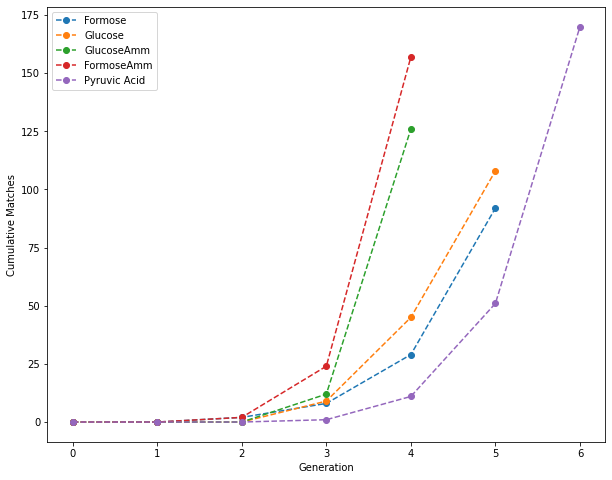

In [16]:
plt.figure(figsize = (10,8))

matches_generations_plot('./MatchedData/FormoseFinal/FormoseFinal_CHNO.tsv', 5)
matches_generations_plot('./MatchedData/GlucoseFinal/GlucoseFinal_CHNO.tsv', 5)
matches_generations_plot('./MatchedData/GlucoseAmm/GlucoseAmm.tsv', 4)
matches_generations_plot('./MatchedData/FormoseAmm/FormoseAmm.tsv', 4)
matches_generations_plot('./MatchedData/PyruvicAcid/PyruvicAcid_CHNO.tsv', 6)

plt.xlabel('Generation')
plt.ylabel('Cumulative Matches')

plt.legend(['Formose','Glucose','GlucoseAmm','FormoseAmm','Pyruvic Acid'])

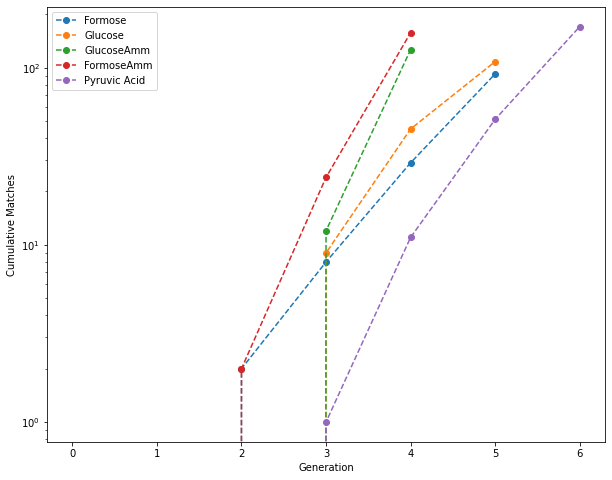

In [17]:
plt.figure(figsize = (10,8))

matches_generations_plot('./MatchedData/FormoseFinal/FormoseFinal_CHNO.tsv', 5)
matches_generations_plot('./MatchedData/GlucoseFinal/GlucoseFinal_CHNO.tsv', 5)
matches_generations_plot('./MatchedData/GlucoseAmm/GlucoseAmm.tsv', 4)
matches_generations_plot('./MatchedData/FormoseAmm/FormoseAmm.tsv', 4)
matches_generations_plot('./MatchedData/PyruvicAcid/PyruvicAcid_CHNO.tsv', 6)

plt.xlabel('Generation')
plt.ylabel('Cumulative Matches')

plt.yscale('Log')

plt.legend(['Formose','Glucose','GlucoseAmm','FormoseAmm','Pyruvic Acid'])

## Mols2Grid Plot

In [30]:
def display(array, descriptions):
    mols = []
    for i in range(len(array)):
        mol = Chem.MolFromSmiles(array[i])
        mols.append(mol)
    return(Draw.MolsToGridImage(mols, maxMols=100, legends = descriptions))

In [31]:
RepresentativeMatches = pd.read_csv('./Figures/MatchesFromEachNetwork.tsv', sep='\t')

In [32]:
Descriptions = ['FormoseAmm G2', 'FormoseAmm G3',
                'FormoseAmm G4', 'Formose G2', 
                'Formose G3', 'Formose G4',
                'Formose G5', 'GlucoseAmm G3',
                'GlucoseAmm G4', 'Glucose G3', 
                'Glucose G4', 'Glucose G5',
                'Pyruvic Acid G3', 'Pyruvic Acid G4',
                'Pyruvic Acid G5', 'Pyruvic Acid G6']

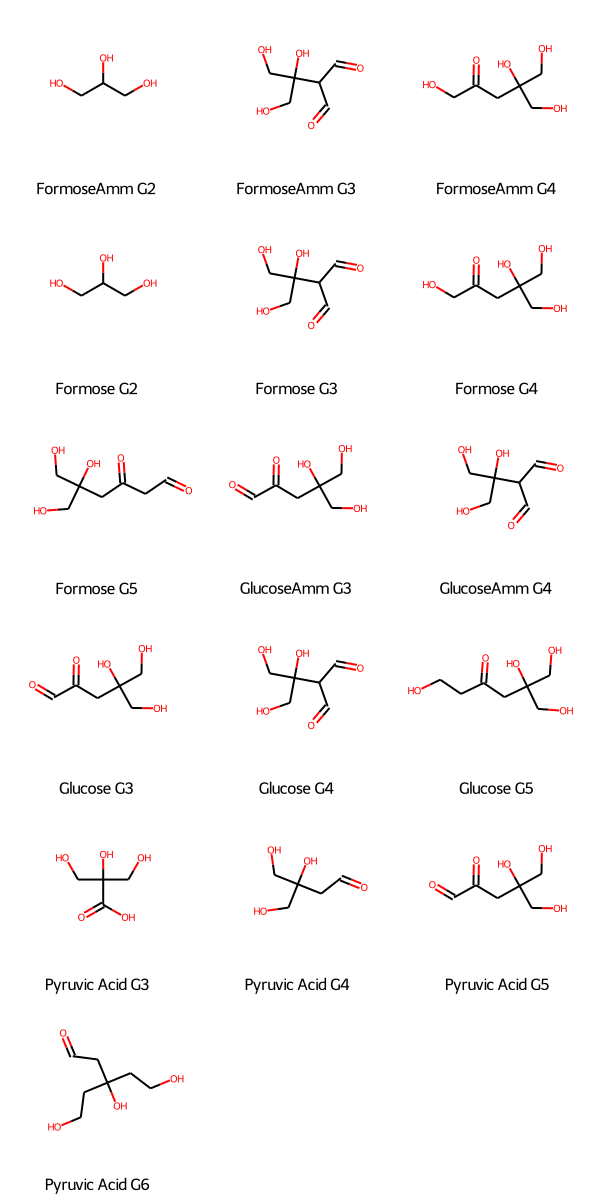

In [33]:
display(RepresentativeMatches['Test Smiles'], Descriptions)